### Clustering

Clustering is a Machine Learning technique that involves the grouping of data points. ... In theory, data points that are in the same group should have similar properties and/or features, while data points in different groups should have highly dissimilar properties and/or features

Clustering Methods :

Density-Based Methods : These methods consider the clusters as the dense region having some similarity and different from the lower dense region of the space. These methods have good accuracy and ability to merge two clusters.Example DBSCAN (Density-Based Spatial Clustering of Applications with Noise) , OPTICS (Ordering Points to Identify Clustering Structure) etc.

Hierarchical Based Methods : The clusters formed in this method forms a tree-type structure based on the hierarchy. New clusters are formed using the previously formed one. It is divided into two category Agglomerative (bottom up approach) Divisive (top down approach) examples CURE (Clustering Using Representatives), BIRCH (Balanced Iterative Reducing Clustering and using Hierarchies) etc.

Partitioning Methods : These methods partition the objects into k clusters and each partition forms one cluster. This method is used to optimize an objective criterion similarity function such as when the distance is a major parameter example K-means, CLARANS (Clustering Large Applications based upon Randomized Search) etc.

Grid-based Methods : In this method the data space is formulated into a finite number of cells that form a grid-like structure. All the clustering operation done on these grids are fast and independent of the number of data objects example STING (Statistical Information Grid), wave cluster, CLIQUE (CLustering In Quest) etc.

Read more
https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68#:~:text=Clustering%20is%20a%20Machine%20Learning,the%20grouping%20of%20data%20points.&text=In%20theory%2C%20data%20points%20that,dissimilar%20properties%20and%2For%20features.

https://machinelearningmastery.com/clustering-algorithms-with-python/

Applications of Clustering


Recommendation engines

Market segmentation

Social network analysis

Search result grouping

Medical imaging

Image segmentation

Anomaly detection

## Task

Segment Countries into their respective Continents Unsupervised ML https://developers.google.com/public-data/docs/canonical/countries_csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Countries.csv")
df.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1, inplace=True)
df.head()

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [3]:
df.dtypes

country       object
latitude     float64
longitude    float64
name          object
dtype: object

In [4]:
df.isnull().sum()

country      1
latitude     1
longitude    1
name         0
dtype: int64

In [5]:
df = df.dropna()

In [6]:
df.columns

Index(['country', 'latitude', 'longitude', 'name'], dtype='object')

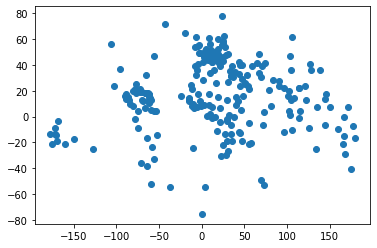

In [7]:
plt.scatter(df['longitude'],df['latitude'])

In [8]:
from sklearn.cluster import KMeans

In [9]:
#by assumption we have 7 continents
#k =7
km = KMeans(n_clusters=7)

In [10]:
Xfeatures = df[['longitude','latitude']]

In [11]:
clusters = km.fit_predict(Xfeatures)

In [12]:
km.labels_

array([2, 1, 1, 3, 3, 2, 1, 3, 5, 5, 3, 0, 2, 4, 3, 1, 2, 3, 6, 2, 5, 2,
       1, 5, 5, 3, 6, 3, 3, 3, 6, 5, 5, 2, 3, 3, 6, 5, 5, 5, 2, 5, 0, 3,
       5, 6, 3, 3, 3, 2, 6, 1, 2, 2, 1, 2, 3, 3, 2, 3, 2, 1, 2, 1, 2, 1,
       2, 4, 3, 4, 2, 2, 5, 2, 3, 1, 3, 2, 5, 2, 2, 2, 5, 3, 5, 2, 3, 3,
       4, 2, 3, 1, 6, 5, 3, 2, 3, 2, 6, 2, 1, 2, 6, 6, 1, 1, 2, 2, 2, 3,
       1, 6, 5, 1, 6, 0, 5, 3, 6, 6, 1, 3, 1, 6, 1, 3, 2, 6, 5, 5, 2, 2,
       2, 2, 2, 2, 2, 2, 5, 4, 2, 2, 6, 6, 6, 4, 3, 2, 3, 2, 5, 6, 5, 3,
       6, 5, 4, 2, 4, 5, 3, 2, 2, 6, 4, 0, 4, 1, 3, 3, 0, 4, 6, 1, 2, 3,
       0, 3, 1, 2, 4, 3, 1, 5, 2, 2, 6, 5, 1, 4, 5, 5, 2, 6, 5, 2, 2, 2,
       5, 2, 2, 1, 3, 5, 3, 1, 5, 3, 5, 5, 5, 6, 1, 0, 4, 1, 2, 0, 1, 3,
       4, 6, 5, 2, 5, 3, 3, 1, 2, 3, 3, 3, 3, 6, 4, 0, 0, 2, 1, 5, 5, 5,
       5])

In [13]:
clusters

array([2, 1, 1, 3, 3, 2, 1, 3, 5, 5, 3, 0, 2, 4, 3, 1, 2, 3, 6, 2, 5, 2,
       1, 5, 5, 3, 6, 3, 3, 3, 6, 5, 5, 2, 3, 3, 6, 5, 5, 5, 2, 5, 0, 3,
       5, 6, 3, 3, 3, 2, 6, 1, 2, 2, 1, 2, 3, 3, 2, 3, 2, 1, 2, 1, 2, 1,
       2, 4, 3, 4, 2, 2, 5, 2, 3, 1, 3, 2, 5, 2, 2, 2, 5, 3, 5, 2, 3, 3,
       4, 2, 3, 1, 6, 5, 3, 2, 3, 2, 6, 2, 1, 2, 6, 6, 1, 1, 2, 2, 2, 3,
       1, 6, 5, 1, 6, 0, 5, 3, 6, 6, 1, 3, 1, 6, 1, 3, 2, 6, 5, 5, 2, 2,
       2, 2, 2, 2, 2, 2, 5, 4, 2, 2, 6, 6, 6, 4, 3, 2, 3, 2, 5, 6, 5, 3,
       6, 5, 4, 2, 4, 5, 3, 2, 2, 6, 4, 0, 4, 1, 3, 3, 0, 4, 6, 1, 2, 3,
       0, 3, 1, 2, 4, 3, 1, 5, 2, 2, 6, 5, 1, 4, 5, 5, 2, 6, 5, 2, 2, 2,
       5, 2, 2, 1, 3, 5, 3, 1, 5, 3, 5, 5, 5, 6, 1, 0, 4, 1, 2, 0, 1, 3,
       4, 6, 5, 2, 5, 3, 3, 1, 2, 3, 3, 3, 3, 6, 4, 0, 0, 2, 1, 5, 5, 5,
       5])

In [14]:
clusters is km.labels_

True

In [15]:
km.cluster_centers_

array([[-164.167216  ,  -15.7990057 ],
       [  48.25626738,   30.05327491],
       [   7.80604397,   44.17186475],
       [ -69.68218541,    8.58624816],
       [ 156.84523619,   -7.98094281],
       [  22.75952849,   -9.80893609],
       [ 103.45510325,   18.34838525]])

In [16]:
# Store and Map
df['cluster_continents'] = clusters
df.head()

,country,latitude,longitude,name,cluster_continents
0,AD,42.546245,1.601554,Andorra,2
1,AE,23.424076,53.847818,United Arab Emirates,1
2,AF,33.939110,67.709953,Afghanistan,1
3,AG,17.060816,-61.796428,Antigua and Barbuda,3
4,AI,18.220554,-63.068615,Anguilla,3


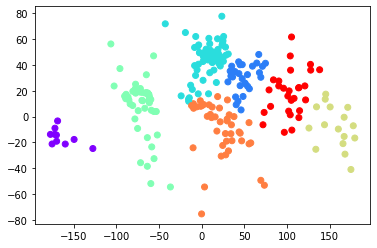

In [17]:
# Plot of our clusters
plt.scatter(df['longitude'],df['latitude'],c=df['cluster_continents'],cmap='rainbow')

In [19]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

NameError: name 'x' is not defined